In [1]:

# student Id : 28280016
# Name: Zhiyue Li
# Email : zlii0010@student.monash.edu

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim


## Q3 dataloader

the following class reads the data for Q3 and creates a torch dataset object for it. With this, you can easily 
use a dataloader to train your model. 

Make sure that the file "hw2_Q3_data.npz" is located properly (in this example, it should be in the same folder as this notebook.

 



In [2]:
class Q3Data(Dataset):
    def __init__(self,trn_tst = 0):
        data = np.load('hw2_Q3_data.npz')
        if trn_tst == 0:
            #trainloader
            self.images = data['arr_0'].T
            self.labels = data['arr_1']
        else:
            #testloader
            self.images = data['arr_2'].T
            self.labels = data['arr_3']
            
        self.images = np.float32(self.images)/255.0


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
   
        sample = self.images[idx,:]
        labels = self.labels[idx]
        return sample, labels

Here is an example of how you can create a dataloader for the Q3 data

In [5]:
trainset =   Q3Data(trn_tst=0)  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                         shuffle=True, num_workers=0)


testset =   Q3Data(trn_tst=1)  
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=0)

In [6]:
# Set device to GPU_index if GPU is available 
GPU_index = 0
device = torch.device(GPU_index if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        input_size = 784
        h1 = 128
        h2 = 64 
        h3 = 32
        output_size = 10
        self.linear1=nn.Linear(input_size,h1)
        self.linear2=nn.Linear(h1,h2)
        self.linear3=nn.Linear(h2,h3)
        self.linear4=nn.Linear(h3,output_size)

    def forward(self, x):
        
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x)
        x = torch.relu(x)
        x=self.linear4(x)
        
        return x




# The train_epoch is quite similar from Lab 5 Practice
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    model.to(device)
    
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data.to(device))
        loss = criterion(outputs,target.to(device))
        
        _,predicted = torch.max(outputs.data,1)
        correct_predictions += (predicted == target.to(device)).sum().item()
        total_predictions +=target.shape[0]
        total_loss = total_loss + loss.item()
        #loss_progress = loss_progress.append(loss.item())
        loss.backward()
        optimizer.step()
     
    acc = (correct_predictions/total_predictions)*100
    #loss_avg = sum(loss_progress)/length(loss_progress)
    loss_avg = total_loss / len(train_loader)
    return loss_avg,acc


# The train_epoch is quite similar from Lab 5 Practice
def test_model(model,test_loader,criterion,optimizer):
    loss_avg = 0
    total_loss = 0
    model.to(device)
    total_predictions = 0
    correct_predictions = 0
    with torch.no_grad():
        model.eval()
       
        
        for batch_idx, (data,target) in enumerate(test_loader):
            outputs = model(data.to(device))
            target = target.to(device)
            _,predicted = torch.max(outputs.data,1)
            correct_predictions+=(predicted == target).sum().item()
            total_predictions += target.shape[0]
            
            # Calcualte teh loss
            loss = criterion(outputs,target.to(device))
            total_loss = total_loss + loss.item()
    
    loss_avg = total_loss/len(test_loader)
    acc = (correct_predictions / total_predictions)*100
    return loss_avg,acc
    
    
train_loss_set = list()
test_loss_set = list()
test_acc_set = list()
train_acc_set = list()

# Define the hyperparameters
lr = 0.0001
n_epoches = 1000
# Create Model
model = MLP()


# Create the Loss function
criterion = nn.CrossEntropyLoss()
# Initialize the optimizer with the above pareameters
optimizer = optim.Adam(model.parameters(),lr = lr)


for i in range(n_epoches):
    print('Epoch', i+1)
    train_loss,train_acc = train_epoch(model, trainloader, criterion, optimizer)
    test_loss,test_acc = test_model(model,testloader,criterion,optimizer)
    train_loss_set.append(train_loss)
    test_loss_set.append(test_loss)
    test_acc_set.append(test_acc)
    train_acc_set.append(train_acc)
    print("--"*30)




Epoch 1
------------------------------------------------------------
Epoch 2
------------------------------------------------------------
Epoch 3
------------------------------------------------------------
Epoch 4
------------------------------------------------------------
Epoch 5
------------------------------------------------------------
Epoch 6
------------------------------------------------------------
Epoch 7
------------------------------------------------------------
Epoch 8
------------------------------------------------------------
Epoch 9
------------------------------------------------------------
Epoch 10
------------------------------------------------------------
Epoch 11
------------------------------------------------------------
Epoch 12
------------------------------------------------------------
Epoch 13
------------------------------------------------------------
Epoch 14
------------------------------------------------------------
Epoch 15
--------------------

------------------------------------------------------------
Epoch 119
------------------------------------------------------------
Epoch 120
------------------------------------------------------------
Epoch 121
------------------------------------------------------------
Epoch 122
------------------------------------------------------------
Epoch 123
------------------------------------------------------------
Epoch 124
------------------------------------------------------------
Epoch 125
------------------------------------------------------------
Epoch 126
------------------------------------------------------------
Epoch 127
------------------------------------------------------------
Epoch 128
------------------------------------------------------------
Epoch 129
------------------------------------------------------------
Epoch 130
------------------------------------------------------------
Epoch 131
------------------------------------------------------------
Epoch 132
------

------------------------------------------------------------
Epoch 235
------------------------------------------------------------
Epoch 236
------------------------------------------------------------
Epoch 237
------------------------------------------------------------
Epoch 238
------------------------------------------------------------
Epoch 239
------------------------------------------------------------
Epoch 240
------------------------------------------------------------
Epoch 241
------------------------------------------------------------
Epoch 242
------------------------------------------------------------
Epoch 243
------------------------------------------------------------
Epoch 244
------------------------------------------------------------
Epoch 245
------------------------------------------------------------
Epoch 246
------------------------------------------------------------
Epoch 247
------------------------------------------------------------
Epoch 248
------

------------------------------------------------------------
Epoch 351
------------------------------------------------------------
Epoch 352
------------------------------------------------------------
Epoch 353
------------------------------------------------------------
Epoch 354
------------------------------------------------------------
Epoch 355
------------------------------------------------------------
Epoch 356
------------------------------------------------------------
Epoch 357
------------------------------------------------------------
Epoch 358
------------------------------------------------------------
Epoch 359
------------------------------------------------------------
Epoch 360
------------------------------------------------------------
Epoch 361
------------------------------------------------------------
Epoch 362
------------------------------------------------------------
Epoch 363
------------------------------------------------------------
Epoch 364
------

------------------------------------------------------------
Epoch 467
------------------------------------------------------------
Epoch 468
------------------------------------------------------------
Epoch 469
------------------------------------------------------------
Epoch 470
------------------------------------------------------------
Epoch 471
------------------------------------------------------------
Epoch 472
------------------------------------------------------------
Epoch 473
------------------------------------------------------------
Epoch 474
------------------------------------------------------------
Epoch 475
------------------------------------------------------------
Epoch 476
------------------------------------------------------------
Epoch 477
------------------------------------------------------------
Epoch 478
------------------------------------------------------------
Epoch 479
------------------------------------------------------------
Epoch 480
------

------------------------------------------------------------
Epoch 583
------------------------------------------------------------
Epoch 584
------------------------------------------------------------
Epoch 585
------------------------------------------------------------
Epoch 586
------------------------------------------------------------
Epoch 587
------------------------------------------------------------
Epoch 588
------------------------------------------------------------
Epoch 589
------------------------------------------------------------
Epoch 590
------------------------------------------------------------
Epoch 591
------------------------------------------------------------
Epoch 592
------------------------------------------------------------
Epoch 593
------------------------------------------------------------
Epoch 594
------------------------------------------------------------
Epoch 595
------------------------------------------------------------
Epoch 596
------

------------------------------------------------------------
Epoch 699
------------------------------------------------------------
Epoch 700
------------------------------------------------------------
Epoch 701
------------------------------------------------------------
Epoch 702
------------------------------------------------------------
Epoch 703
------------------------------------------------------------
Epoch 704
------------------------------------------------------------
Epoch 705
------------------------------------------------------------
Epoch 706
------------------------------------------------------------
Epoch 707
------------------------------------------------------------
Epoch 708
------------------------------------------------------------
Epoch 709
------------------------------------------------------------
Epoch 710
------------------------------------------------------------
Epoch 711
------------------------------------------------------------
Epoch 712
------

------------------------------------------------------------
Epoch 815
------------------------------------------------------------
Epoch 816
------------------------------------------------------------
Epoch 817
------------------------------------------------------------
Epoch 818
------------------------------------------------------------
Epoch 819
------------------------------------------------------------
Epoch 820
------------------------------------------------------------
Epoch 821
------------------------------------------------------------
Epoch 822
------------------------------------------------------------
Epoch 823
------------------------------------------------------------
Epoch 824
------------------------------------------------------------
Epoch 825
------------------------------------------------------------
Epoch 826
------------------------------------------------------------
Epoch 827
------------------------------------------------------------
Epoch 828
------

------------------------------------------------------------
Epoch 931
------------------------------------------------------------
Epoch 932
------------------------------------------------------------
Epoch 933
------------------------------------------------------------
Epoch 934
------------------------------------------------------------
Epoch 935
------------------------------------------------------------
Epoch 936
------------------------------------------------------------
Epoch 937
------------------------------------------------------------
Epoch 938
------------------------------------------------------------
Epoch 939
------------------------------------------------------------
Epoch 940
------------------------------------------------------------
Epoch 941
------------------------------------------------------------
Epoch 942
------------------------------------------------------------
Epoch 943
------------------------------------------------------------
Epoch 944
------

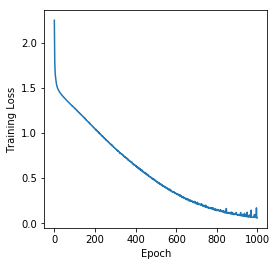

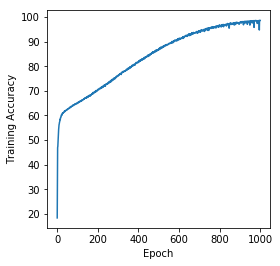

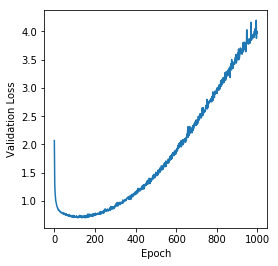

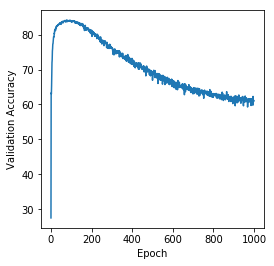

In [8]:

# Visualize the Training Data
figure = plt.figure(figsize = (4,4))
#plt.title('n = '+str(n))
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.plot(range(len(train_loss_set)),train_loss_set)

figure = plt.figure(figsize = (4,4))
#plt.title('n = '+str(n))
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.plot(range(len(train_acc_set)),train_acc_set)

figure = plt.figure(figsize = (4,4))
#plt.title('n = '+str(n))
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.plot(range(len(test_loss_set)),test_loss_set)

figure = plt.figure(figsize = (4,4))
#plt.title('n = '+str(n))
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.plot(range(len(test_acc_set)),test_acc_set)